The dimension of $X_1$ and $X_2$ is $100\times400$. $\sigma = 0.5$

In [1]:
library(plyr)
library(ggplot2)

In [4]:
load('summary_sigma_0.5.Rdata')
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'top')
dataset1 = rbind(Stein_vol)
dataset1['sigma'] = 0.5
Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
Lasso_vol['c'] = 'vol'
Lasso_radius['c'] = 'radius'
dataset2 = rbind(Stein_vol, Stein_radius, Lasso_vol, Lasso_radius)
dataset2['sigma'] = 0.5

In [5]:
load('summary_sigma_1.Rdata')

Stein_vol2 = ddply(summary_volume_stein_single_alpha, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius2 = ddply(summary_radius_stein_single_alpha, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol2 = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius2 = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

dataset3 = rbind(Stein_vol2)
dataset3['sigma'] = 1
dataset3 = dataset3[dataset3$design == 'toeplitz',]
Stein_vol2['c'] = 'vol'
Stein_radius2['c'] = 'radius'
Lasso_vol2['c'] = 'vol'
Lasso_radius2['c'] = 'radius'
dataset4 = rbind(Stein_vol2, Stein_radius2, Lasso_vol2, Lasso_radius2)
dataset4['sigma'] = 1

In [6]:
load('summary_sigma_2.Rdata')

Stein_vol3 = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius3 = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol3 = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius3 = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

dataset5 = rbind(Stein_vol3)
dataset5['sigma'] = 2
Stein_vol3['c'] = 'vol'
Stein_radius3['c'] = 'radius'
Lasso_vol3['c'] = 'vol'
Lasso_radius3['c'] = 'radius'
dataset6 = rbind(Stein_vol3, Stein_radius3, Lasso_vol3, Lasso_radius3)
dataset6['sigma'] = 2

In [7]:
dataset7 = rbind(dataset1, dataset3, dataset5)

Saving 6.67 x 6.67 in image


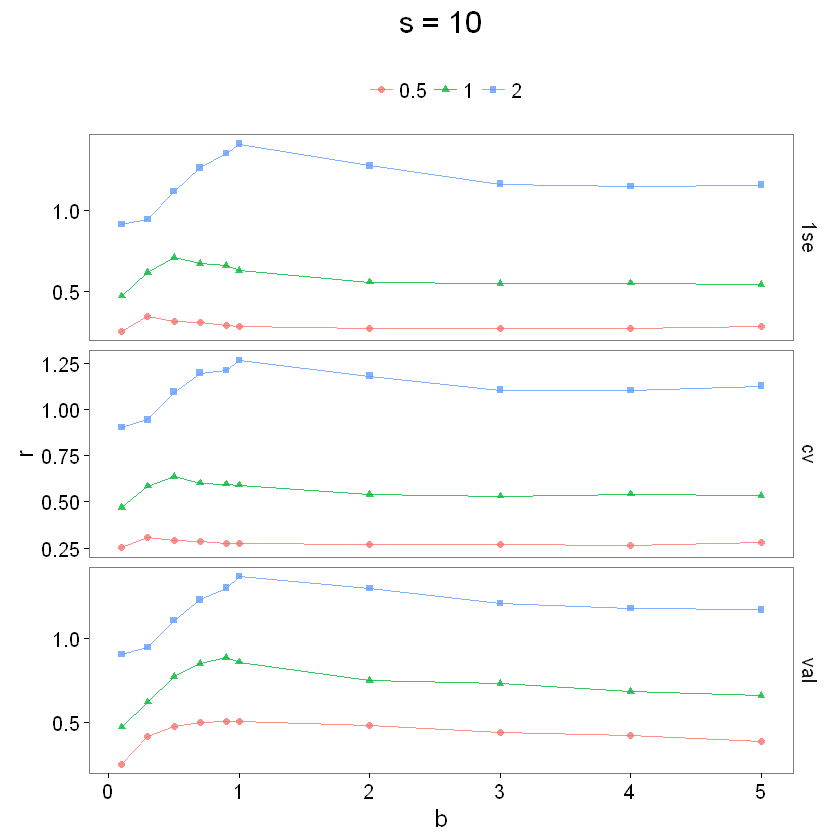

In [11]:
ggplot(data = dataset7[dataset7$s == 10, ], aes(x = b, y = r, color = factor(sigma), shape = factor(sigma))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(lam1Type~., scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings

ggsave('different_sigma.pdf')

In [10]:
?ggsave